In [1]:
import pandas as pd
import numpy as np
from autoviz import data_cleaning_suggestions
from sklearn.impute import SimpleImputer
import sklearn.metrics as skm
import category_encoders as ce
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTENC

from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from keras.optimizers import Adam
import tensorflow as tf

Imported v0.1.808. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\ML course\PatientSurvivalDetection_Project4\Dataset\Original_Dataset.csv")
df.shape

(91713, 186)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [158]:
data_cleaning_suggestions(df)

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
encounter_id,int64,0.000000,100,1.000000,131051.000000,Possible ID column: drop before modeling step.
patient_id,int64,0.000000,100,1.000000,131051.000000,Possible ID column: drop before modeling step.
hospital_id,int64,0.000000,0,2.000000,204.000000,No issue
hospital_death,int64,0.000000,0,0.000000,1.000000,No issue
age,float64,4.610033,NA,16.000000,89.000000,"4228 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 170 outliers greater than upper bound (109.50) or lower than lower bound(17.50). Cap them or remove them."
bmi,float64,3.738837,NA,14.844926,67.814990,"3429 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 3289 outliers greater than upper bound (46.86) or lower than lower bound(9.71). Cap them or remove them."
elective_surgery,int64,0.000000,0,0.000000,1.000000,No issue
ethnicity,object,1.521049,0,,,"1395 missing values. Impute them with mean, median, mode, or a constant value such as 123., 1 rare categories: ['Native American']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
gender,object,0.027259,0,,,"25 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
height,float64,1.454538,NA,137.200000,195.590000,"1334 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 463 outliers greater than upper bound (200.75) or lower than lower bound(139.55). Cap them or remove them."


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
encounter_id,int64,0.000000,100,1.0,131051.0,Possible ID column: drop before modeling step.
patient_id,int64,0.000000,100,1.0,131051.0,Possible ID column: drop before modeling step.
hospital_id,int64,0.000000,0,2.0,204.0,No issue
hospital_death,int64,0.000000,0,0.0,1.0,No issue
age,float64,4.610033,NA,16.0,89.0,"4228 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 170 outliers greater than upper bound (109.50) or lower than lower bound(17.50). Cap them or remove them."
bmi,float64,3.738837,NA,14.844926,67.81499,"3429 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 3289 outliers greater than upper bound (46.86) or lower than lower bound(9.71). Cap them or remove them."
elective_surgery,int64,0.000000,0,0.0,1.0,No issue
ethnicity,object,1.521049,0,,,"1395 missing values. Impute them with mean, median, mode, or a constant value such as 123., 1 rare categories: ['Native American']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
gender,object,0.027259,0,,,"25 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
height,float64,1.454538,NA,137.2,195.59,"1334 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 463 outliers greater than upper bound (200.75) or lower than lower bound(139.55). Cap them or remove them."


**Remove duplicate rows and remove columns which have IDs / null values > 50% / co-related**

In [159]:
col_drop = df.columns[df.columns.str.endswith('_id')]
df.drop(columns = col_drop, inplace = True)
df.shape

(91713, 182)

In [160]:
df['ethnicity'].replace(to_replace = ['Other/Unknown'],value = np.nan, inplace = True)
df['ethnicity'].unique()
# bmi already records height and weight; readmission_status is a constant column
df.drop(columns = ['height','weight','readmission_status'], inplace = True)
df.shape

(91713, 179)

In [161]:
arr1 = []
for i in df:
    if (df[i].isnull().sum() / 91713) > 0.5:
        arr1.append(i)
df.drop(columns = arr1, inplace = True)
df.shape

(91713, 105)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 105 entries, hospital_death to apache_2_bodysystem
dtypes: float64(94), int64(3), object(8)
memory usage: 73.5+ MB


In [163]:
# In general, columns and dtypes would be copied directly if pd.Dataframe(df) is called but SimpleImputer defaults in, hence needed to mention explicitly
impute = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(impute.fit_transform(df),columns = df.columns).astype(dict(df.dtypes))

In [164]:
df.isnull().sum()

hospital_death                   0
age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
hospital_admit_source            0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
bun_apache                       0
creatinine_apache                0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
glucose_apache                   0
heart_rate_apache                0
hematocrit_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
sodium_apache                    0
temp_apache         

In [165]:
df.duplicated().sum()

0

**Outliers Treatment**

In [166]:
df_temp = df.copy()

In [167]:
df['age'][np.where(df['age'] > 60)[0]]

0        68.0
1        77.0
3        81.0
5        67.0
7        70.0
         ... 
91705    67.0
91707    67.0
91708    75.0
91711    67.0
91712    82.0
Name: age, Length: 55925, dtype: float64

In [168]:
np.where(df['age'] > 60)[0]

array([    0,     1,     3, ..., 91708, 91711, 91712], dtype=int64)

In [169]:
len(np.where(df['age'] > 60))

1

In [170]:
type(np.where(df['age'] > 60)[0])

numpy.ndarray

In [171]:
type(df['age'][df['age'] > 60].index)

pandas.core.indexes.numeric.Int64Index

In [172]:
df['age'][df['age'][df['age'] > 60].index]

0        68.0
1        77.0
3        81.0
5        67.0
7        70.0
         ... 
91705    67.0
91707    67.0
91708    75.0
91711    67.0
91712    82.0
Name: age, Length: 55925, dtype: float64

In [173]:
def limit(col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    df[col][np.where(df[col] < low)[0]] = low

    df[col][np.where(df[col] > high)[0]] = high
    return low, high

In [174]:
def find_limits(col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    return low, high

count    91713.000000
mean        62.525749
std         16.413382
min         16.000000
25%         53.000000
50%         66.000000
75%         75.000000
max         89.000000
Name: age, dtype: float64

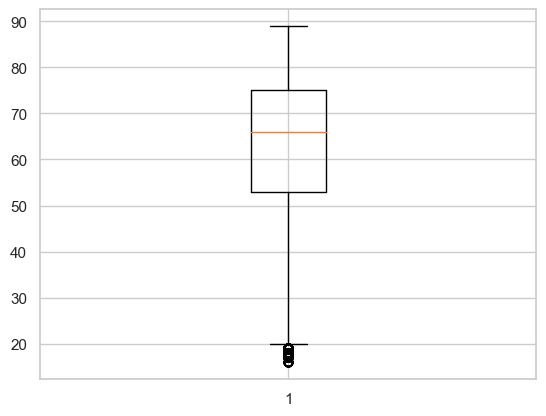

In [175]:
# All are at least teenagers, let's not cap the values
plt.boxplot(df['age'])
df['age'].describe()

(8.824355845000001, 46.950284444999994)


count    91713.000000
mean        28.353590
std          7.630187
min         14.844926
25%         23.121579
50%         27.374997
75%         32.653061
max         46.950284
Name: bmi, dtype: float64

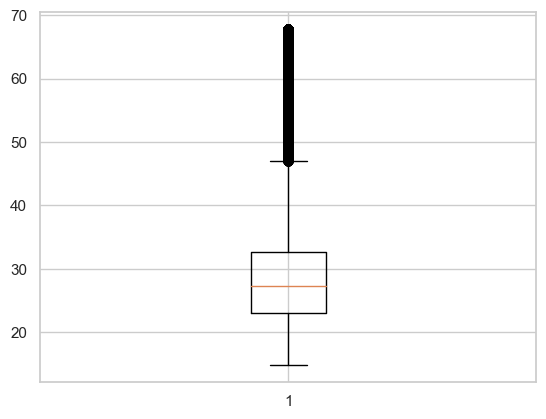

In [176]:
# BMI of 40 and above is considered, obese hence upper capping makes sense
plt.boxplot(df['bmi'])
print (limit('bmi'))
df['bmi'].describe()

In [177]:
df['ethnicity'][np.where(df['ethnicity'] == 'Native American')[0]] = 'Caucasian'
df['ethnicity'].unique()

array(['Caucasian', 'Hispanic', 'African American', 'Asian'], dtype=object)

In [178]:
# ['Other ICU', 'Chest Pain Center', 'ICU to SDU', 'ICU', 'Observation', 'Other']
index_sub = df['hospital_admit_source'][df['hospital_admit_source'].isin(['Other ICU', 'Chest Pain Center', 'ICU to SDU', 'ICU','Observation', 'Other'])].index
df['hospital_admit_source'][index_sub] = 'Acute Care/Floor'
df['hospital_admit_source'].unique()

array(['Floor', 'Emergency Department', 'Operating Room', 'Direct Admit',
       'Other Hospital', 'Acute Care/Floor', 'Recovery Room',
       'Step-Down Unit (SDU)', 'PACU'], dtype=object)

In [179]:
df['icu_admit_source'][np.where(df['icu_admit_source'] == 'Other ICU')[0]] = 'Floor'
df['icu_admit_source'].unique()

array(['Floor', 'Accident & Emergency', 'Operating Room / Recovery',
       'Other Hospital'], dtype=object)

In [180]:
df['icu_stay_type'][np.where(df['icu_stay_type'] == 'readmit')[0]] = 'admit'
df['icu_stay_type'].unique()

array(['admit', 'transfer'], dtype=object)

count    91713.000000
mean       557.530103
std        460.519921
min          0.010000
25%        203.010000
50%        410.010000
75%        703.030000
max       2201.050000
Name: apache_3j_diagnosis, dtype: float64

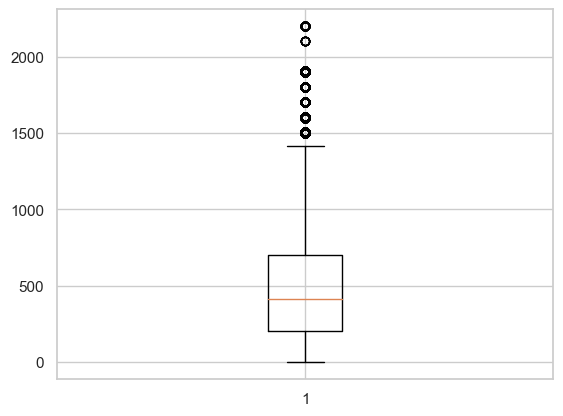

In [181]:
# Not much idea, let's retain it
plt.boxplot(df['apache_3j_diagnosis'])
df['apache_3j_diagnosis'].describe()

(-8.0, 48.0)


count    91713.000000
mean        20.923073
std         12.500148
min          4.000000
25%         13.000000
50%         15.000000
75%         27.000000
max         48.000000
Name: bun_apache, dtype: float64

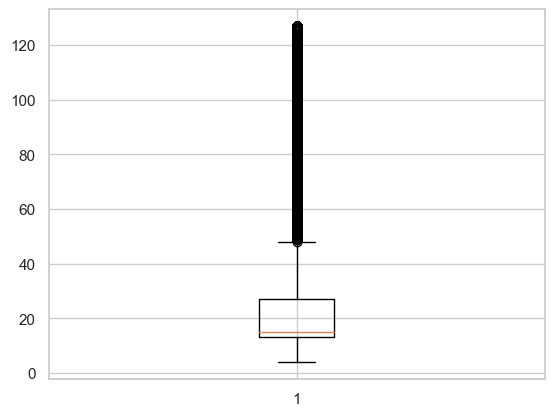

In [182]:
# upto 8.5 mmol/l is considered normal, hence capping makes sense
plt.boxplot(df['bun_apache'])
print (limit('bun_apache'))
df['bun_apache'].describe()

(-0.0050000000000000044, 2.115)


count    91713.000000
mean         1.081363
std          0.507220
min          0.300000
25%          0.790000
50%          0.820000
75%          1.320000
max          2.115000
Name: creatinine_apache, dtype: float64

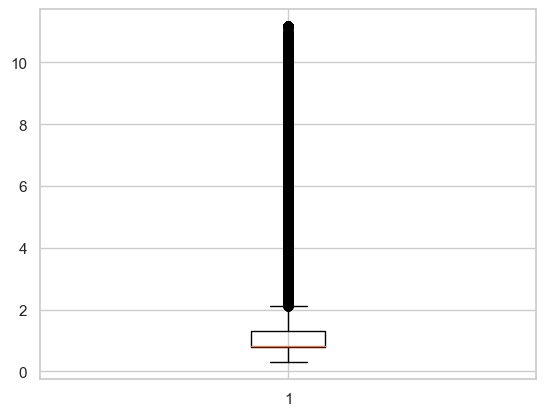

In [183]:
# conc. > 1.8 results in apache 3 score, hence valid to cap it
plt.boxplot(df['creatinine_apache'])
print (limit('creatinine_apache'))
df['creatinine_apache'].describe()

count    91713.000000
mean         3.476138
std          0.944878
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          4.000000
Name: gcs_eyes_apache, dtype: float64

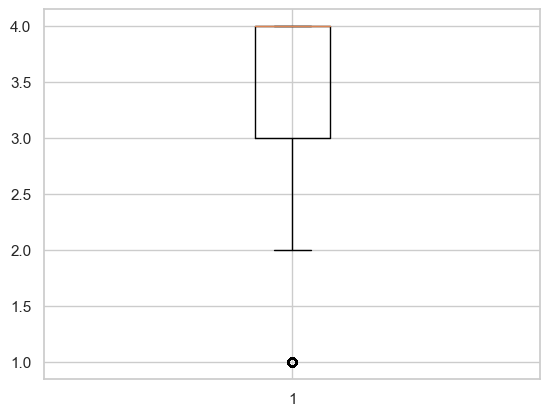

In [184]:
# 8 or below represents abnormality, so let's not cap it
plt.boxplot(df['gcs_eyes_apache'])
df['gcs_eyes_apache'].describe()

In [185]:
df.drop(columns = 'gcs_motor_apache', inplace = True)
df.shape

(91713, 104)

(2.5, 6.5)


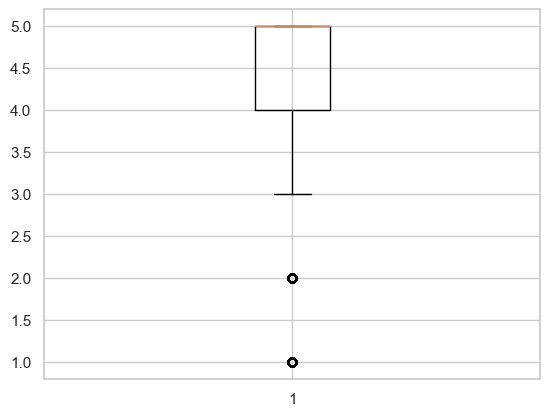

In [186]:
# 3-15 is the ideal range, hence capping up to 3 makes sense
plt.boxplot(df['gcs_verbal_apache'])
df['gcs_verbal_apache'].describe()
print (limit('gcs_verbal_apache'))

(-39.0, 321.0)


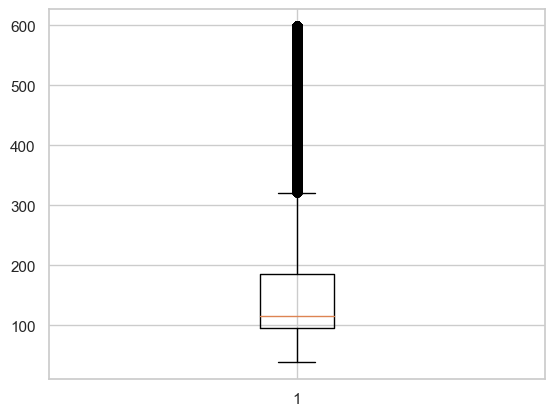

In [187]:
# 70-140 is the ideal range, capping makes sense
plt.boxplot(df['glucose_apache'])
df['glucose_apache'].describe()
print (limit('glucose_apache'))

count    91713.000000
mean        99.710728
std         30.722391
min         30.000000
25%         87.000000
50%        104.000000
75%        120.000000
max        178.000000
Name: heart_rate_apache, dtype: float64

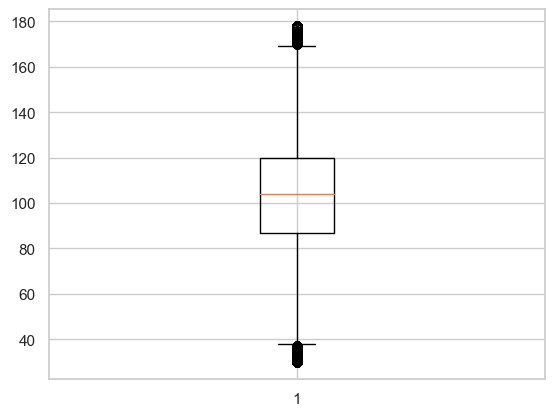

In [188]:
# 60-170 is the generalized range for all ages, 30 means that heart rate is low, but not dying- not capping 
plt.boxplot(df['heart_rate_apache'])
df['heart_rate_apache'].describe()

count    91713.000000
mean       138.208583
std          4.231618
min        126.000000
25%        136.000000
50%        139.000000
75%        140.000000
max        150.000000
Name: sodium_apache, dtype: float64

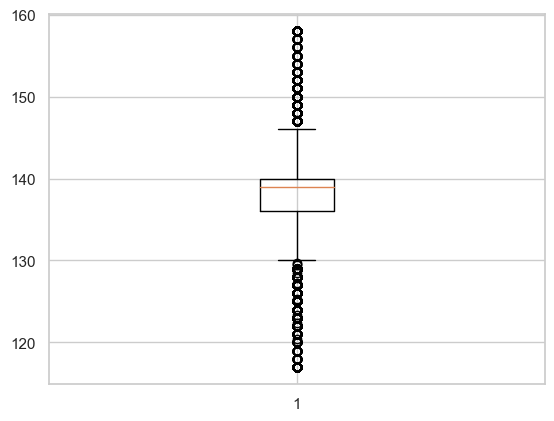

In [189]:
# 126-150 mmol/l is the ideal range, capping makes sense
plt.boxplot(df['sodium_apache'])
find_limits('sodium_apache')
df['sodium_apache'][np.where(df['sodium_apache'] < 126.00)[0]] = 126.00

df['sodium_apache'][np.where(df['sodium_apache'] > 150.00)[0]] = 150.00
df['sodium_apache'].describe()

count    91713.000000
mean        36.413824
std          0.814621
min         32.100000
25%         36.200000
50%         36.400000
75%         36.700000
max         39.700000
Name: temp_apache, dtype: float64

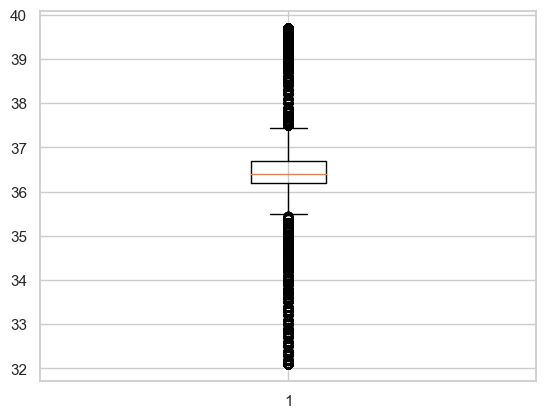

In [190]:
# person surely dies if temp. is below 28 or above 47 deg. hence no capping
plt.boxplot(df['temp_apache'])
df['temp_apache'].describe()

(-1.6899999999999995, 22.55)


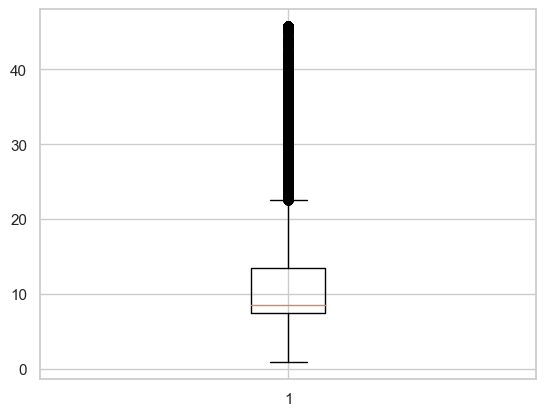

In [191]:
# 11 - 20 is considered infectious, hence cap
plt.boxplot(df['wbc_apache'])
df['wbc_apache'].describe()
print (limit('wbc_apache'))

(39.0, 135.0)


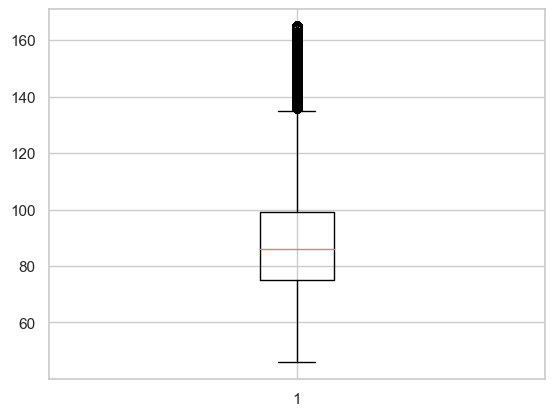

In [192]:
# Diastolic means pressure experienced while heart is resting between beats
# Person dies if value is less than 50 or greater than 120 max
plt.boxplot(df['d1_diasbp_max'])
df['d1_diasbp_max'].describe()
print (limit('d1_diasbp_max'))

(18.0, 82.0)

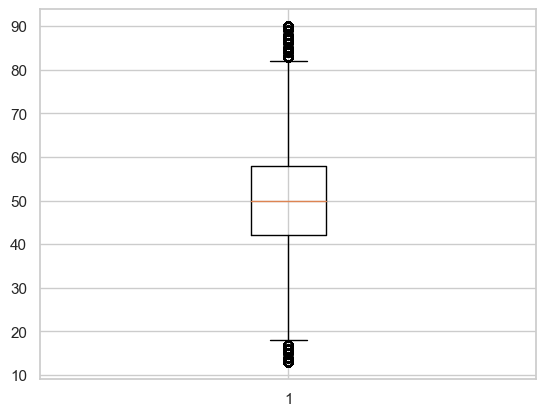

In [193]:
plt.boxplot(df['d1_diasbp_min'])
find_limits('d1_diasbp_min')
limit('d1_diasbp_min')

In [194]:
df.drop(columns = ['d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min',
'd1_heartrate_max'], inplace = True)
df.shape

(91713, 101)

count    91713.000000
mean        70.448322
std         16.116247
min         28.500000
25%         60.000000
50%         69.000000
75%         81.000000
max        112.500000
Name: d1_heartrate_min, dtype: float64

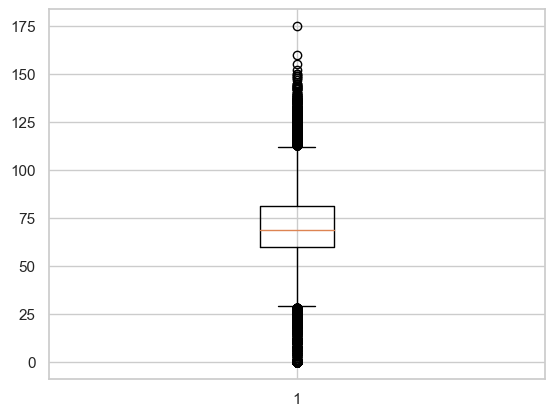

In [195]:
plt.boxplot(df['d1_heartrate_min'])
limit('d1_heartrate_min')
df['d1_heartrate_min'].describe()

In [196]:
df.drop(columns = ['d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min'],
inplace = True)
df.shape

(91713, 97)

(7.0, 47.0)

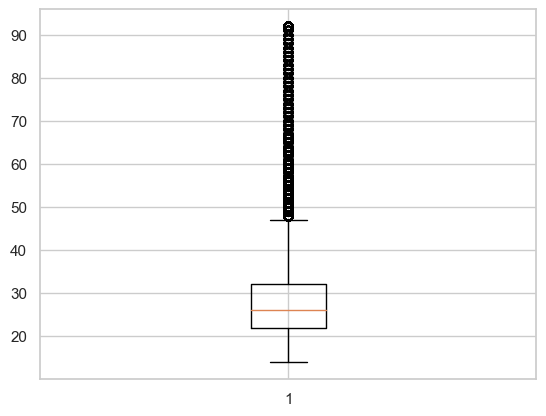

In [197]:
# 12-18 is the ideal range of respiration, below 8 or above 33 are signs of dying
plt.boxplot(df['d1_resprate_max'])
df['d1_resprate_max'].describe()
limit('d1_resprate_max')

(1.0, 25.0)

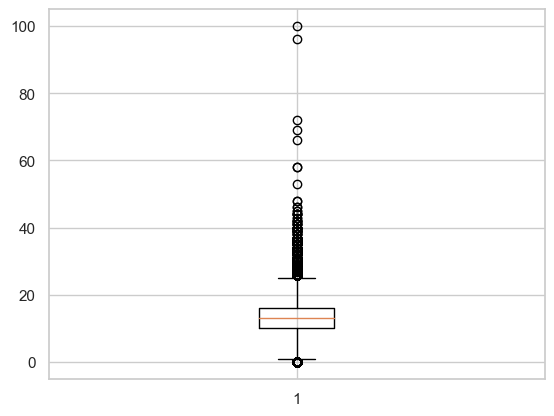

In [198]:
plt.boxplot(df['d1_resprate_min'])
df['d1_resprate_min'].describe()
limit('d1_resprate_min')

(97.5, 101.5)

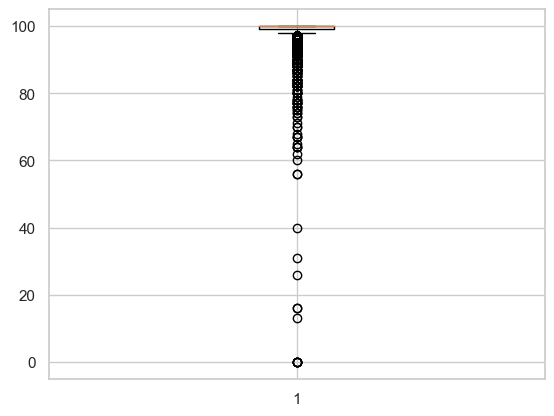

In [199]:
# Most of the values are between 99 and 100, the remaining are outliers, people's death depends on low spo2 conc.
plt.boxplot(df['d1_spo2_max'])
df['d1_spo2_max'].describe()
find_limits('d1_spo2_max')
limit('d1_spo2_max')


(80.0, 104.0)

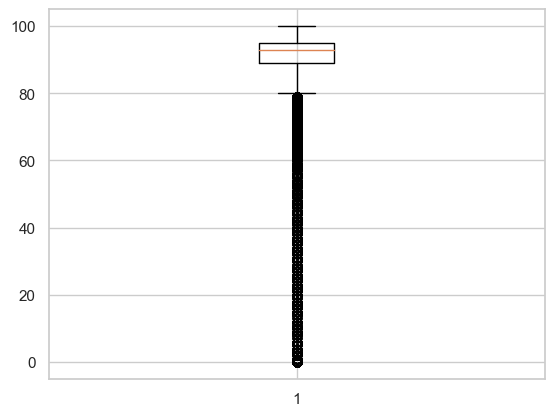

In [200]:
# under 70% is life-threatening
plt.boxplot(df['d1_spo2_min'])
df['d1_spo2_min'].describe()
find_limits('d1_spo2_min')
limit('d1_spo2_min')


(79.0, 215.0)

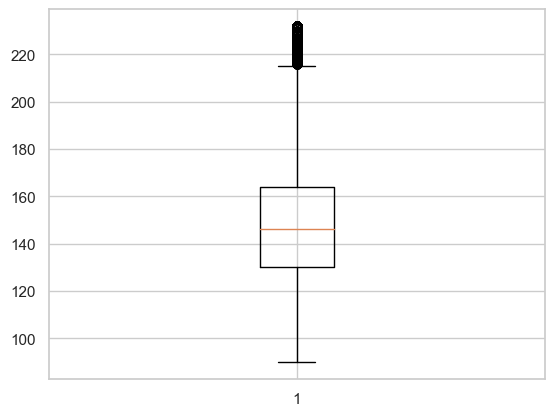

In [201]:
# Systolic death range is less than 90 or more than 180
plt.boxplot(df['d1_sysbp_max'])
find_limits('d1_sysbp_max')
limit('d1_sysbp_max')

count    91713.000000
mean        96.911866
std         20.662005
min         41.000000
25%         84.000000
50%         96.000000
75%        110.000000
max        160.000000
Name: d1_sysbp_min, dtype: float64 (45.0, 149.0)


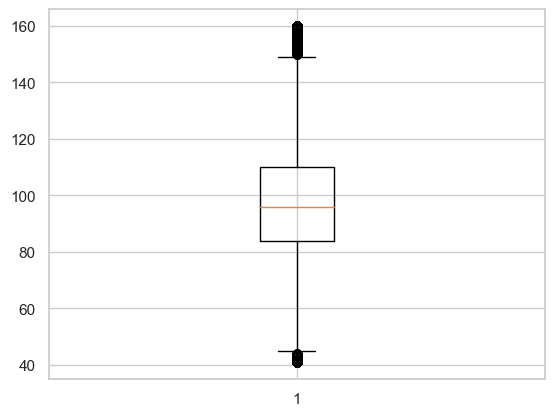

In [202]:
plt.boxplot(df['d1_sysbp_min'])
print (df['d1_sysbp_min'].describe(), find_limits('d1_sysbp_min'))

index_drop = df['d1_sysbp_min'][df['d1_sysbp_min'] < 90].index
df['d1_sysbp_min'][np.where(df['d1_sysbp_min'] < 90)[0]] = 90

In [203]:
df.drop(columns = ['d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min'], inplace = True)
df.shape

(91713, 95)

{'whiskers': [<matplotlib.lines.Line2D at 0x2463ab62250>,
 'caps': [<matplotlib.lines.Line2D at 0x2463ab63d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2463ab178d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2463a81f590>],
 'fliers': [<matplotlib.lines.Line2D at 0x2463abfed90>],
 'means': []}

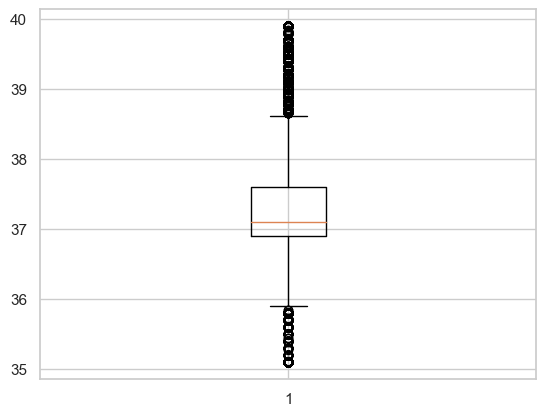

In [204]:
plt.boxplot(df['d1_temp_max'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24627e88910>,
 'caps': [<matplotlib.lines.Line2D at 0x24627e88ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x246494f16d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24627e8b250>],
 'fliers': [<matplotlib.lines.Line2D at 0x24627e8a490>],
 'means': []}

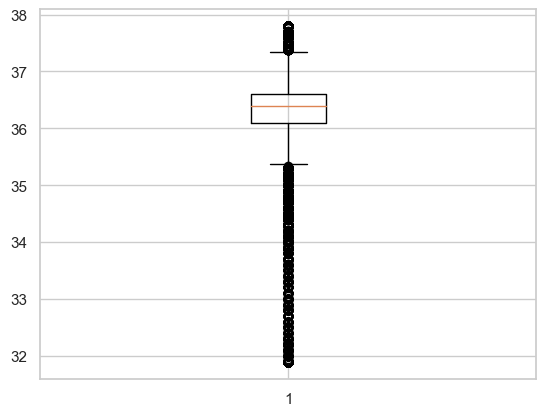

In [205]:
plt.boxplot(df['d1_temp_min'])

count    91713.000000
mean        74.834516
std         17.399011
min         37.000000
25%         63.000000
50%         73.000000
75%         86.000000
max        120.500000
Name: h1_diasbp_max, dtype: float64

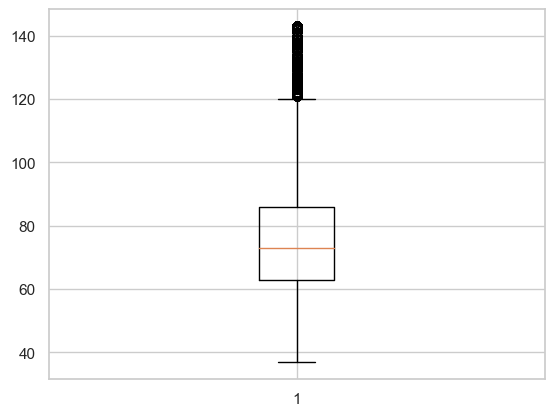

In [206]:
# person dies if value is less than 50 or greater than 120 max
plt.boxplot(df['h1_diasbp_max'])
limit('h1_diasbp_max')
df['h1_diasbp_max'].describe()

(20.5, 104.5)

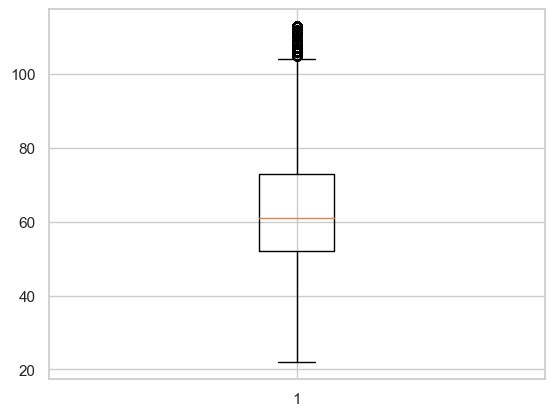

In [207]:
plt.boxplot(df['h1_diasbp_min'])
limit('h1_diasbp_min')

In [208]:
df.drop(columns = ['h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min'], inplace = True)
df.shape

(91713, 93)

count    91713.000000
mean        91.857174
std         21.591581
min         46.000000
25%         77.000000
50%         89.000000
75%        105.000000
max        164.000000
Name: h1_heartrate_max, dtype: float64

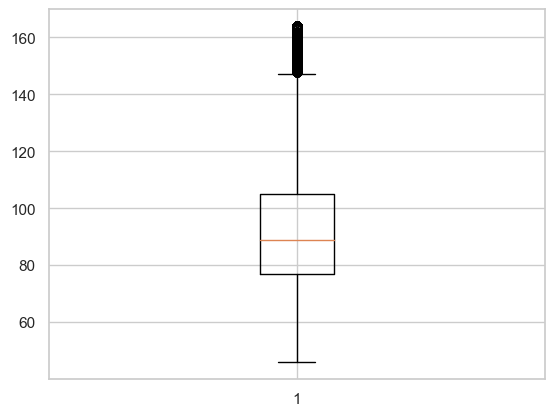

In [209]:
# Not abnormal
plt.boxplot(df['h1_heartrate_max'])
df['h1_heartrate_max'].describe()

In [210]:
df.drop(columns = ['h1_heartrate_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max',
'h1_mbp_noninvasive_min'], inplace = True)
df.shape

(91713, 88)

(6.0, 38.0)

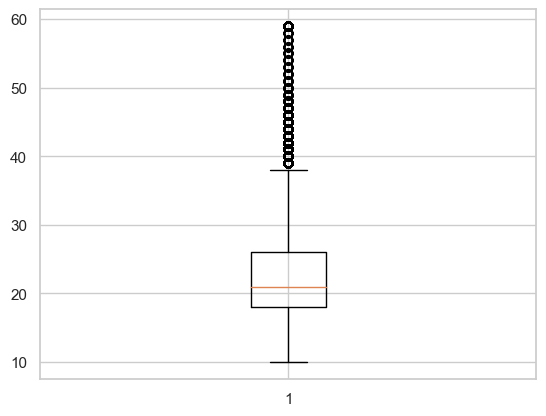

In [211]:
# 12-18 is the ideal range of respiration, below 8 or above 33 are signs of dying
plt.boxplot(df['h1_resprate_max'])
limit('h1_resprate_max')

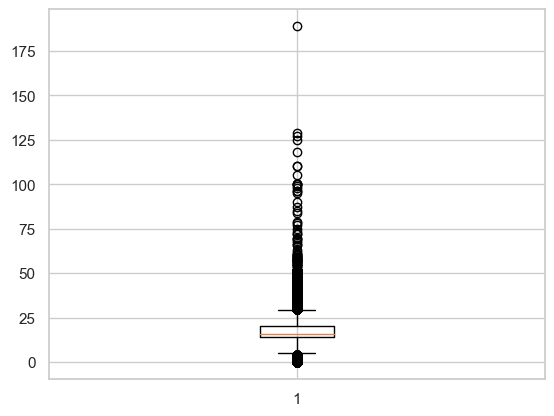

In [212]:
plt.boxplot(df['h1_resprate_min'])
df['h1_resprate_min'][np.where(df['h1_resprate_min'] < 8)[0]] = 8

df['h1_resprate_min'][np.where(df['h1_resprate_min'] > 33)[0]] = 33

(91713, 87)

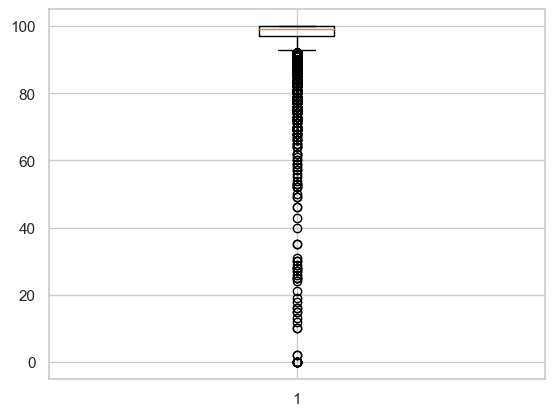

In [213]:
plt.boxplot(df['h1_spo2_max'])
df.drop(columns = 'h1_spo2_max', inplace = True)
df.shape

(86.5, 106.5)


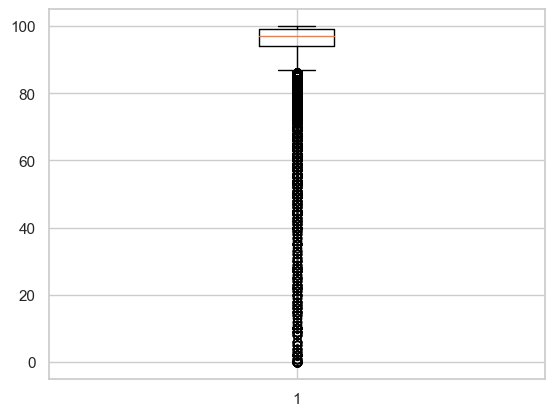

In [214]:
plt.boxplot(df['h1_spo2_min'])
print (find_limits('h1_spo2_min'))
df['h1_spo2_min'][np.where(df['h1_spo2_min'] < 70)[0]] = 70

(61.5, 201.5)

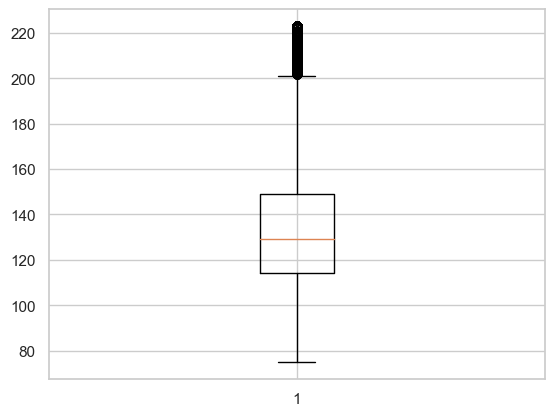

In [215]:
# range is between 90 and 180
plt.boxplot(df['h1_sysbp_max'])
limit('h1_sysbp_max')

In [216]:
df.drop(columns = ['h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min'],
inplace = True)
df.shape

(91713, 84)

{'whiskers': [<matplotlib.lines.Line2D at 0x2463cda0790>,
 'caps': [<matplotlib.lines.Line2D at 0x2463c20d710>,
 'boxes': [<matplotlib.lines.Line2D at 0x2463cda3f90>],
 'medians': [<matplotlib.lines.Line2D at 0x2463c20d490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2463cda3710>],
 'means': []}

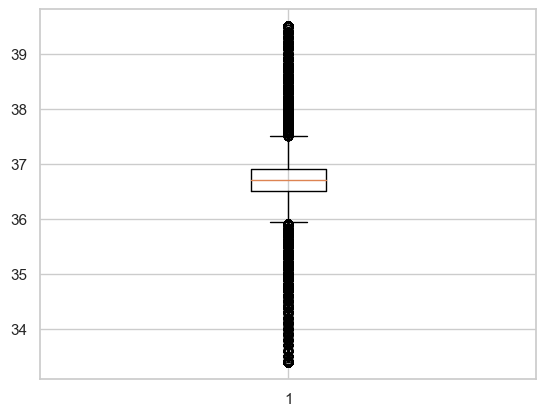

In [217]:
plt.boxplot(df['h1_temp_max'])

In [218]:
df.drop(columns = ['h1_temp_min','d1_bun_max','d1_bun_min'], inplace = True)
df.shape

(91713, 81)

{'whiskers': [<matplotlib.lines.Line2D at 0x2463c798790>,
 'caps': [<matplotlib.lines.Line2D at 0x2463c799a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2463c797ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x2463c79aa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2463c79b450>],
 'means': []}

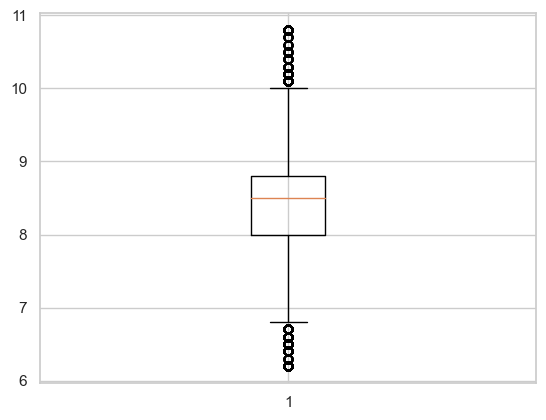

In [219]:
plt.boxplot(df['d1_calcium_max'])
# units look wrong, it should be mg/dl instead of mmol/l. if former is considered, then no outliers

In [220]:
df.drop(columns = ['d1_calcium_min','d1_creatinine_max','d1_creatinine_min',
'd1_glucose_max'], inplace = True)
df.shape

(91713, 77)

(36.5, 184.5)

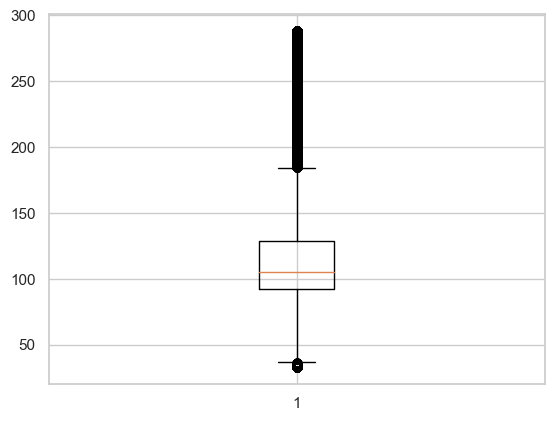

In [221]:
# person goes into coma if below 50, can live at a risk if level is upto 300
plt.boxplot(df['d1_glucose_min'])
limit('d1_glucose_min')


(16.0, 32.0)

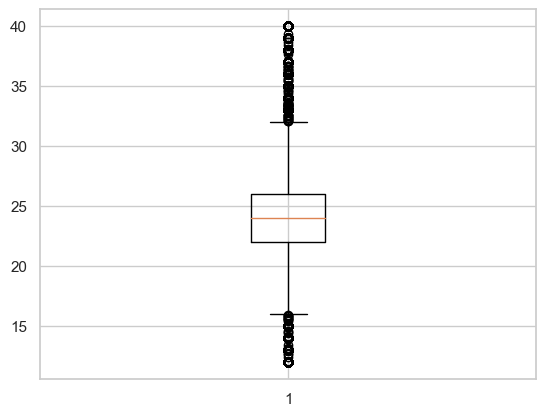

In [222]:
# bicarbonate conc. abnormal ranges have no direct relation with death, hence not capping
plt.boxplot(df['d1_hco3_max'])
find_limits('d1_hco3_max')

In [223]:
df.drop(columns = ['d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min',
'd1_hematocrit_max','d1_hematocrit_min'], inplace = True)
df.shape

(91713, 72)

count    91713.000000
mean       202.399376
std         83.576241
min         27.000000
25%        157.000000
50%        180.000000
75%        240.000000
max        585.000000
Name: d1_platelets_max, dtype: float64

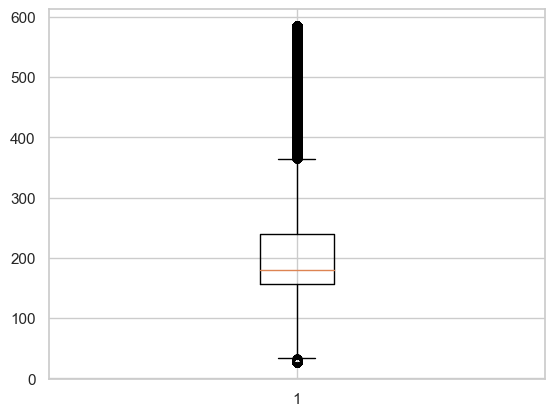

In [224]:
# values are considered to be microlitre (not nanolitre)
# person dies if below 50, no deadly impact for more than 500, hence retaining the values
plt.boxplot(df['d1_platelets_max'])
df['d1_platelets_max'].describe()

In [225]:
df.drop(columns = 'd1_platelets_min', inplace = True)
df.shape

(91713, 71)

{'whiskers': [<matplotlib.lines.Line2D at 0x2463c73d510>,
 'caps': [<matplotlib.lines.Line2D at 0x2463c73e6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2463c7ef2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2463c73d750>],
 'fliers': [<matplotlib.lines.Line2D at 0x2463c73cc10>],
 'means': []}

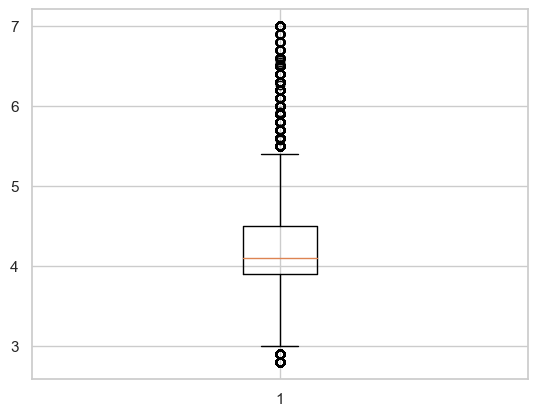

In [226]:
# 2.5 to 8.5, retain it
plt.boxplot(df['d1_potassium_max'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2463cd57110>,
 'caps': [<matplotlib.lines.Line2D at 0x2463cdb8250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2463c70a050>],
 'medians': [<matplotlib.lines.Line2D at 0x2463cdb9410>],
 'fliers': [<matplotlib.lines.Line2D at 0x2463a541cd0>],
 'means': []}

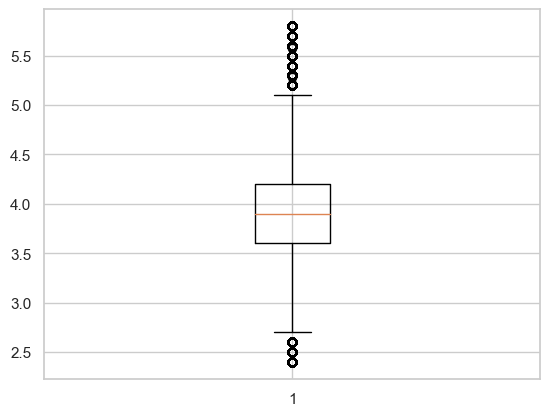

In [227]:
plt.boxplot(df['d1_potassium_min'])

In [228]:
df.drop(columns = ['d1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min'], inplace = True)
df.shape

(91713, 67)

In [229]:
# probabilities cannot be negative, hence capping them to 0
df.drop(columns = ['apache_4a_hospital_death_prob'], inplace = True)

In [230]:
df['apache_3j_bodysystem'].unique()
# Substituting with similar names
df['apache_3j_bodysystem'][np.where(df['apache_3j_bodysystem'] == 'Hematological')[0]] = 'Cardiovascular'
df['apache_3j_bodysystem'][np.where(df['apache_3j_bodysystem'] == 'Gynecological')[0]] = 'Genitourinary'

In [231]:
df['apache_2_bodysystem'][np.where(df['apache_2_bodysystem'] == 'Haematologic')[0]] = 'Cardiovascular'
df['apache_2_bodysystem'][df['apache_2_bodysystem'].isin(['Undefined diagnoses','Musculoskeletal/Skin'])] = 'Trauma'
df['apache_2_bodysystem'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary',
       'Undefined Diagnoses'], dtype=object)

In [234]:
for i in df.describe(include = ['O']).columns:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   hospital_death               91713 non-null  int64   
 1   age                          91713 non-null  float64 
 2   bmi                          91713 non-null  float64 
 3   elective_surgery             91713 non-null  int64   
 4   ethnicity                    91713 non-null  category
 5   gender                       91713 non-null  category
 6   hospital_admit_source        91713 non-null  category
 7   icu_admit_source             91713 non-null  category
 8   icu_stay_type                91713 non-null  category
 9   icu_type                     91713 non-null  category
 10  pre_icu_los_days             91713 non-null  float64 
 11  apache_2_diagnosis           91713 non-null  float64 
 12  apache_3j_diagnosis          91713 non-null  float64 
 13  a

In [235]:
df.to_csv('Patient_FinalData.csv', index=False)

**Treating the misbalanced class**

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\ML course\PatientSurvivalDetection_Project4\Dataset\Patient_FinalData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_death               91713 non-null  int64  
 1   age                          91713 non-null  float64
 2   bmi                          91713 non-null  float64
 3   elective_surgery             91713 non-null  int64  
 4   ethnicity                    91713 non-null  object 
 5   gender                       91713 non-null  object 
 6   hospital_admit_source        91713 non-null  object 
 7   icu_admit_source             91713 non-null  object 
 8   icu_stay_type                91713 non-null  object 
 9   icu_type                     91713 non-null  object 
 10  pre_icu_los_days             91713 non-null  float64
 11  apache_2_diagnosis           91713 non-null  float64
 12  apache_3j_diagnosis          91713 non-null  float64
 13  apache_post_oper

In [3]:
for i in df.describe(include = ['O']).columns:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   hospital_death               91713 non-null  int64   
 1   age                          91713 non-null  float64 
 2   bmi                          91713 non-null  float64 
 3   elective_surgery             91713 non-null  int64   
 4   ethnicity                    91713 non-null  category
 5   gender                       91713 non-null  category
 6   hospital_admit_source        91713 non-null  category
 7   icu_admit_source             91713 non-null  category
 8   icu_stay_type                91713 non-null  category
 9   icu_type                     91713 non-null  category
 10  pre_icu_los_days             91713 non-null  float64 
 11  apache_2_diagnosis           91713 non-null  float64 
 12  apache_3j_diagnosis          91713 non-null  float64 
 13  a

In [4]:
y = df['hospital_death']
X = df.drop(columns = 'hospital_death')
X.shape, y.shape

((91713, 65), (91713,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

(array([58648.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5551.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

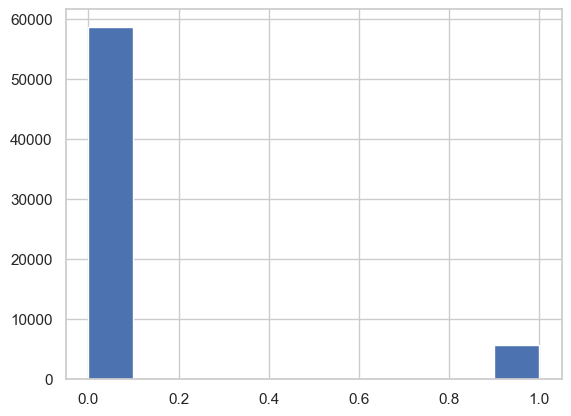

In [6]:
# Hospital deaths are the minority class, need to resample or add class weights into the model
plt.hist(y_train)

[ 3  4  5  6  7  8 63 64]


(array([58648.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 58648.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

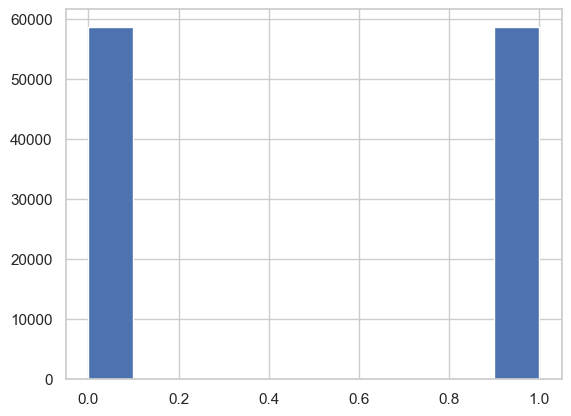

In [7]:
categorical_features = X_train.describe(include = 'category').columns
categorical_features = X_train.columns.get_indexer(categorical_features)
print (categorical_features)
smt = SMOTENC(categorical_features)
X_new_train, y_new_train = smt.fit_resample(X_train,y_train)
plt.hist(y_new_train)

In [8]:
encode = ce.OrdinalEncoder()
X_train_encoded = encode.fit_transform(X_new_train)
X_test_encoded = encode.fit_transform(X_test)

In [9]:
# about normalize: axis = -1 (default) implies all the data sets, axis = 0 means along the row and 1 means along the column
# order = 2 (default) refers to the L2 norm. which is necesssary to prevent overfitting or embed generalization, instead of order=1
# Converts to a tensor, it is nothing but a numpy array that results in efficient ML
X_train_norm = keras.utils.normalize(X_train_encoded, axis = -1, order = 2)
X_test_norm = keras.utils.normalize(X_test_encoded, axis = -1, order = 2)

# Convert y to tensors as well to maintain the tensor types
y_new_train = tf.convert_to_tensor(y_new_train)
y_new_test = tf.convert_to_tensor(y_test)

In [12]:
convert_to

54965    0
78059    0
70670    0
73829    0
41278    1
        ..
42819    0
85034    0
30315    0
49542    0
82123    0
Name: hospital_death, Length: 27514, dtype: int64

In [10]:
X_train_norm.shape, X_test_norm.shape, y_new_train.shape, y_new_test.shape

(TensorShape([117296, 65]),
 TensorShape([27514, 65]),
 TensorShape([117296]),
 TensorShape([27514]))

In [12]:
# print (compute_class_weight(class_weight='balanced', classes=y_train.unique(),y=y_train))
# class_weight = {0:0.55,1:5.78}

[0.54732472 5.78265177]


**Baseline Modeling**

In [29]:
# Result: upsampling gave better results than assigning class weights, former will be considered henceforth
# AUC(curve = 'ROC') for balanced classes, if imbalanced use 'PR' or Precision-Recall Curve
model = Sequential(name = 'PatientSurvival_NN')
model.add(Dense(200,input_shape=(65,),activation = 'relu', name = 'layer1'))
model.add(Dense(100, activation='relu', name = 'layer2'))
model.add(Dense(65, activation='relu', name = 'layer3'))
# model.add(Dense(16, activation='relu', name = 'layer4'))
# model.add(Dense(8, activation='relu', name = 'layer5'))
# model.add(Dense(4, activation='relu', name = 'layer6'))
# model.add(Dense(2, activation='relu', name = 'layer7'))
model.add(Dense(1,activation = 'sigmoid', name = 'output'))

model.compile(loss = 'binary_crossentropy',optimizer=Adam(0.01),metrics=['recall','auc'])

checkpoint_callback = ModelCheckpoint('best_model.keras', monitor = 'auc', save_best_only=True,mode = 'max')
lr_callback = ReduceLROnPlateau(monitor = 'auc', factor = 0.95, patience = 5, mode = 'max', verbose = 1)
stopping_callback = EarlyStopping(monitor = 'auc', patience = 10, mode = 'max', verbose = 1)
tensorboard_callback = TensorBoard(log_dir=r'C:\Users\Dell\Desktop\ML course\PatientSurvivalDetection_Project4\logs')
history = model.fit(X_train_norm,y_new_train,validation_data=(X_test_norm,y_new_test),epochs = 100,
                     verbose = 1, callbacks=[checkpoint_callback,lr_callback, stopping_callback, tensorboard_callback])

Epoch 1/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - auc: 0.7866 - loss: 0.5479 - recall: 0.7327 - val_auc: 0.8457 - val_loss: 0.4342 - val_recall: 0.7301 - learning_rate: 0.0100
Epoch 2/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - auc: 0.8661 - loss: 0.4550 - recall: 0.8144 - val_auc: 0.8443 - val_loss: 0.3054 - val_recall: 0.5495 - learning_rate: 0.0100
Epoch 3/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - auc: 0.8733 - loss: 0.4432 - recall: 0.8211 - val_auc: 0.8388 - val_loss: 0.3883 - val_recall: 0.6760 - learning_rate: 0.0100
Epoch 4/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - auc: 0.8783 - loss: 0.4344 - recall: 0.8384 - val_auc: 0.8458 - val_loss: 0.5693 - val_recall: 0.8253 - learning_rate: 0.0100
Epoch 5/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - auc: 0.8838 - loss: 0.4252 - recall: 0.8436 - val_auc: 0.8497 - val_loss: 0.3346 - val_recall: 0.6472 - learning_rate: 0.0100
Epoch 6/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - auc: 0.8872 - loss: 0.41

In [31]:
# print (): There should not be space between f and "
# Result: Recall is too low
scores = model.evaluate(X_test_norm, y_new_test, verbose = 0)
print (scores)
print(f"Recall = {scores[1]*100}  and AUC = {scores[2]*100}")

[0.38330525159835815, 0.6582064032554626, 0.8338564038276672]
Recall = 65.82064032554626  and AUC = 83.38564038276672


In [32]:
# While loading the model, the model architecture gets copied as well
# Use: helps to reuse the model without re-training
best_model = keras.models.load_model('best_model.keras')
best_score = best_model.evaluate(X_test_norm, y_new_test)
print(f"Best Model: Recall = {best_score[1]*100}  and AUC = {best_score[2]*100}")

860/860 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - auc: 0.8304 - loss: 0.3836 - recall: 0.6532
Best Model: Recall = 65.82064032554626  and AUC = 83.38564038276672


In [35]:
# Understanding if auc is a suitable metric, suitable for imbalanced dataset instead of accuracy
y_pred = model.predict(X_test_norm)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
print (skm.classification_report (y_new_test, y_pred))

860/860 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     25150
           1       0.27      0.66      0.38      2364

    accuracy                           0.81     27514
   macro avg       0.61      0.74      0.63     27514
weighted avg       0.90      0.81      0.85     27514



**Control Overfitting:**

Dropping out random nodes of a layer makes the model view new layers and indirectly training it to multiple-layer architectures at different training times

The dropped node is temp. removed from the network at both input (not backpropagated) and output (contribution is not considered) sides, making the model trained to sparse representation as well (where most feature values are 0)

It is representated as p: the % of values to be dropped

If dropout is used after input node, p <=0.2, recommended between 0.2 and 0.5

In [11]:
model1 = Sequential(name = 'PatientSurvival_NN')
model1.add(Dense(200,input_shape=(65,),activation = 'relu', name = 'layer1'))
model1.add(Dropout(0.2))
model1.add(Dense(100, activation='relu', name = 'layer2'))
model1.add(Dropout(0.2))
model1.add(Dense(65, activation='relu', name = 'layer3'))
# model.add(Dense(16, activation='relu', name = 'layer4'))
# model.add(Dense(8, activation='relu', name = 'layer5'))
# model.add(Dense(4, activation='relu', name = 'layer6'))
# model.add(Dense(2, activation='relu', name = 'layer7'))
model1.add(Dense(1,activation = 'sigmoid', name = 'output'))

model1.compile(loss = 'binary_crossentropy',optimizer=Adam(0.01),metrics=['recall','auc'])

checkpoint_callback = ModelCheckpoint('best_model1.keras', monitor = 'auc', save_best_only=True,mode = 'max')
lr_callback = ReduceLROnPlateau(monitor = 'auc', factor = 0.95, patience = 5, mode = 'max', verbose = 1)
stopping_callback = EarlyStopping(monitor = 'auc', patience = 10, mode = 'max', verbose = 1)
tensorboard_callback = TensorBoard(log_dir=r'C:\Users\Dell\Desktop\ML course\PatientSurvivalDetection_Project4\logs1')
history = model1.fit(X_train_norm,y_new_train,validation_data=(X_test_norm,y_new_test),epochs = 100,
                     verbose = 1, callbacks=[checkpoint_callback,lr_callback, stopping_callback, tensorboard_callback])

Epoch 1/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - auc: 0.7402 - loss: 0.5887 - recall: 0.6610 - val_auc: 0.8367 - val_loss: 0.4261 - val_recall: 0.7373 - learning_rate: 0.0100
Epoch 2/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - auc: 0.8394 - loss: 0.4929 - recall: 0.7833 - val_auc: 0.8415 - val_loss: 0.5202 - val_recall: 0.8033 - learning_rate: 0.0100
Epoch 3/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - auc: 0.8414 - loss: 0.4905 - recall: 0.7958 - val_auc: 0.8475 - val_loss: 0.3938 - val_recall: 0.7407 - learning_rate: 0.0100
Epoch 4/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - auc: 0.8537 - loss: 0.4741 - recall: 0.8055 - val_auc: 0.8439 - val_loss: 0.6185 - val_recall: 0.8587 - learning_rate: 0.0100
Epoch 5/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - auc: 0.8567 - loss: 0.4689 - recall: 0.7932 - val_auc: 0.8427 - val_loss: 0.4305 - val_recall: 0.7690 - learning_rate: 0.0100
Epoch 6/100
3666/3666 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - auc: 0.8594 - loss: 0.4

In [38]:
scores = model1.evaluate(X_test_norm, y_new_test, verbose = 0)
print(f"Recall = {scores[1]*100}  and AUC = {scores[2]*100}")

Recall = 61.67512536048889  and AUC = 84.35391187667847


In [39]:
y_pred = model1.predict(X_test_norm)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
print (skm.classification_report (y_new_test, y_pred))

860/860 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     25150
           1       0.31      0.62      0.41      2364

    accuracy                           0.85     27514
   macro avg       0.63      0.74      0.66     27514
weighted avg       0.90      0.85      0.87     27514

